## 2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

### (1) 데이터 가져오기

* sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.  
* diabetes의 data를 df_X에, target을 df_y에 저장해주세요.  

In [322]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

diabetes=load_diabetes()
#sklearn.datasets의 load_diabetes에서 데이터를 가져왔다.
#그림을 그릴 수 있으므로 mpatplot을 가져왔다.

In [323]:
df_X=diabetes.data
df_y=diabetes.target #y 는 당뇨병 수치이다.
#데이터와 타겟을 저장해주었다.

### (2) 모델에 입력할 데이터 X 준비하기

df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [324]:
import numpy as np
np.array(df_X)
X=np.array(df_X)

### (3) 모델에 예측할 데이터 y 준비하기

df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [325]:
np.array(df_y)
y=np.array(df_y) #dy에 numpy array로 변환된 df_y를 저장

### (4) train 데이터와 test 데이터로 분리하기

X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [326]:
from sklearn.model_selection import train_test_split
#분할 하기 위해 train_test_split 함수를 가져왔다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train 개수:  353 , X_test 개수:  89
(353, 10) (353,)
(89, 10) (89,)


### (5) 모델 준비하기

* 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
* 모델 함수를 구현해주세요.

In [327]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


shape를 이용하여 모양을 파악할 수 있습니다.  
 x는 (442,10)의 배열, 즉 10개의 정보를 가진 입력값이 총 442개가 있는 ndarray입니다.

In [328]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [329]:
W = np.random.rand(10)
b = np.random.rand()

#길이가 10인 W와 1개의 숫자인 b를 준비합니다.

In [330]:
W

array([0.90410483, 0.37282617, 0.1512107 , 0.1836445 , 0.43328345,
       0.29278003, 0.43013734, 0.5913995 , 0.77582821, 0.96351178])

In [331]:
b

0.27725045545316096

### 모델 함수 

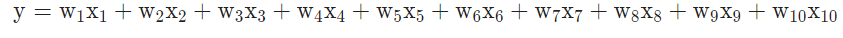

In [332]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

### (6) 손실함수 loss 정의하기

* 손실함수를 MSE 함수로 정의해주세요.

In [333]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse
# MSE함수 정의.

In [334]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### (7) 기울기를 구하는 gradient 함수 구현하기

* 기울기를 계산하는 gradient 함수를 구현해주세요.

In [335]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [336]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.47174579  -13.74412278 -189.60379062 -142.63775331  -68.23429567
  -55.98912819  127.64658773 -138.97636598 -182.79284563 -123.41254329]
db: -303.7124674148855


dW 값이 음의 값으로 10개가 나오고 b 의 값이 음의 값으로 나왔다.

### (8) 하이퍼 파라미터인 학습률 설정하기
* 학습률, learning rate 를 설정해주세요  
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [337]:
LEARNING_RATE = 0.001

학습률을 0.001로 두겠습니다.



In [338]:
losses = []
W = np.random.rand(10)
b = np.random.rand()

#길이가 10인 W와 1개의 숫자인 b를 준비합니다.
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 28701.8994
Iteration 20 : Loss 27778.8440
Iteration 30 : Loss 26891.3134
Iteration 40 : Loss 26037.9199
Iteration 50 : Loss 25217.3307
Iteration 60 : Loss 24428.2650
Iteration 70 : Loss 23669.4924
Iteration 80 : Loss 22939.8304
Iteration 90 : Loss 22238.1431
Iteration 100 : Loss 21563.3391
Iteration 110 : Loss 20914.3698
Iteration 120 : Loss 20290.2277
Iteration 130 : Loss 19689.9445
Iteration 140 : Loss 19112.5903
Iteration 150 : Loss 18557.2713
Iteration 160 : Loss 18023.1288
Iteration 170 : Loss 17509.3378
Iteration 180 : Loss 17015.1057
Iteration 190 : Loss 16539.6707
Iteration 200 : Loss 16082.3011
Iteration 210 : Loss 15642.2937
Iteration 220 : Loss 15218.9728
Iteration 230 : Loss 14811.6894
Iteration 240 : Loss 14419.8196
Iteration 250 : Loss 14042.7642
Iteration 260 : Loss 13679.9474
Iteration 270 : Loss 13330.8157
Iteration 280 : Loss 12994.8377
Iteration 290 : Loss 12671.5024
Iteration 300 : Loss 12360.3190
Iteration 310 : Loss 12060.8159
Iteration 320 : L

loss 가 줄어드는게 눈에 보이지만 1000번의 반복으로는 아직 목표치인 3000 아래까진 되지 않았고 아직 수렴하는 모습이 보이지 않는다.

In [339]:
LEARNING_RATE = 0.1

학습률을 0.1로 두겠습니다.

In [340]:
losses = []
W = np.random.rand(10)
b = np.random.rand()

#길이가 10인 W와 1개의 숫자인 b를 준비합니다.
#초기화를 해줘야 한다.
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4524.0990
Iteration 20 : Loss 3657.8641
Iteration 30 : Loss 3381.6533
Iteration 40 : Loss 3229.2888
Iteration 50 : Loss 3132.6720
Iteration 60 : Loss 3067.1900
Iteration 70 : Loss 3021.3696
Iteration 80 : Loss 2988.7686
Iteration 90 : Loss 2965.3267
Iteration 100 : Loss 2948.3297
Iteration 110 : Loss 2935.9115
Iteration 120 : Loss 2926.7703
Iteration 130 : Loss 2919.9898
Iteration 140 : Loss 2914.9207
Iteration 150 : Loss 2911.1003
Iteration 160 : Loss 2908.1967
Iteration 170 : Loss 2905.9705
Iteration 180 : Loss 2904.2482
Iteration 190 : Loss 2902.9031
Iteration 200 : Loss 2901.8423
Iteration 210 : Loss 2900.9970
Iteration 220 : Loss 2900.3164
Iteration 230 : Loss 2899.7621
Iteration 240 : Loss 2899.3056
Iteration 250 : Loss 2898.9250
Iteration 260 : Loss 2898.6039
Iteration 270 : Loss 2898.3296
Iteration 280 : Loss 2898.0922
Iteration 290 : Loss 2897.8842
Iteration 300 : Loss 2897.6996
Iteration 310 : Loss 2897.5339
Iteration 320 : Loss 2897.3834
Iteration 330 : L

loss 가 줄어드는게 눈에 보이고 반복 1000 번만에 2891에 수렴하는 만족 스러운 값을 얻었다.

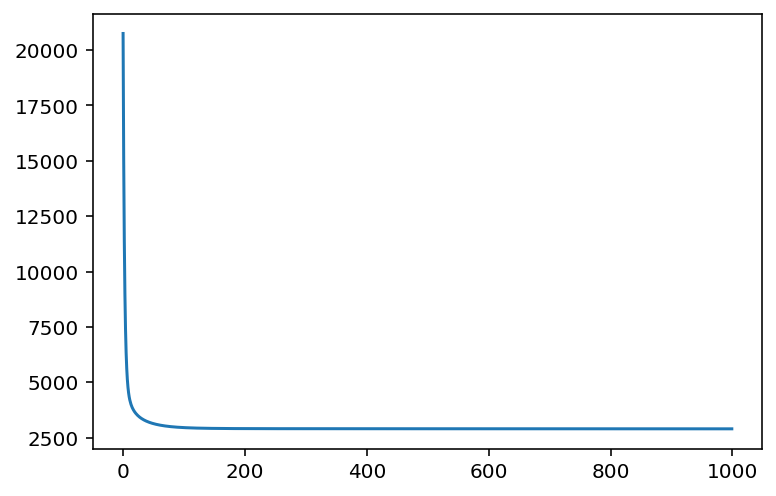

In [341]:
plt.plot(losses)
plt.show()

그래프로 표현 해주었다.

### (9) 모델 학습하기

* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

위에서 학습은 했으므로 X에 들어가는 특성 컬럼을 몇 개 빼고 실험을 한다.

In [342]:
LEARNING_RATE = 0.1

In [343]:
losses = []
W = np.random.rand(9)
b = np.random.rand()

#길이가 9인 W와 1개의 숫자인 b를 준비합니다.
#초기화를 해줘야 한다.
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

IndexError: index 9 is out of bounds for axis 0 with size 9

사이즈가 안맞다고 에러가 뜬다.
따라서 이 식을 맞춰 주려면 X의 특성 값을 줄여줘야한다.

In [344]:
X=X[:,:9]

In [345]:
print(X.shape)

(442, 9)


In [346]:
from sklearn.model_selection import train_test_split
#분할 하기 위해 train_test_split 함수를 가져왔다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train 개수:  353 , X_test 개수:  89
(353, 9) (353,)
(89, 9) (89,)


만일 split을 해주지 않으면 위에 있는 X가 10개 일대 X_train을 가져와서 9개인 W 값과 오류가 일어난다.

In [347]:
def model(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [348]:
losses = []
W = np.random.rand(9)
b = np.random.rand()

#길이가 9인 W와 1개의 숫자인 b를 준비합니다.
#초기화를 해줘야 한다.
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 4528.9904
Iteration 20 : Loss 3639.1876
Iteration 30 : Loss 3349.8762
Iteration 40 : Loss 3192.3511
Iteration 50 : Loss 3095.7383
Iteration 60 : Loss 3033.1165
Iteration 70 : Loss 2991.4665
Iteration 80 : Loss 2963.4173
Iteration 90 : Loss 2944.3963
Iteration 100 : Loss 2931.4357
Iteration 110 : Loss 2922.5682
Iteration 120 : Loss 2916.4760
Iteration 130 : Loss 2912.2712
Iteration 140 : Loss 2909.3533
Iteration 150 : Loss 2907.3148
Iteration 160 : Loss 2905.8787
Iteration 170 : Loss 2904.8559
Iteration 180 : Loss 2904.1175
Iteration 190 : Loss 2903.5750
Iteration 200 : Loss 2903.1678
Iteration 210 : Loss 2902.8543
Iteration 220 : Loss 2902.6057
Iteration 230 : Loss 2902.4023
Iteration 240 : Loss 2902.2304
Iteration 250 : Loss 2902.0805
Iteration 260 : Loss 2901.9461
Iteration 270 : Loss 2901.8227
Iteration 280 : Loss 2901.7069
Iteration 290 : Loss 2901.5968
Iteration 300 : Loss 2901.4906
Iteration 310 : Loss 2901.3874
Iteration 320 : Loss 2901.2863
Iteration 330 : L

In [349]:
dW, db = gradient(X, W, b, y)
print(W)
print("dW:", dW)
print("db:", db)

#W와 dW의 값들이 9개 만 나오는걸 확인 할 수 있다.

[  47.91039888 -238.20569806  564.72378696  351.54104936 -193.37543846
  -56.27489634 -171.08501809  176.17149196  466.56297279]
dW: [ 8.28012972  2.97306729  5.1066539   4.66366658 -6.55975055 -5.29369932
 -6.71086503  1.51972108 -5.02108911]
db: -1.5453409829929408


### (10) test 데이터에 대한 성능 확인하기
test 데이터에 대한 성능을 확인해주세요.

In [350]:
prediction = model(X_test, W, b) # 모델이 예측한 값
mse = loss(X_test, W, b, y_test) #실제값
mse

2902.224968836775

모델이 X_train으로 계산한 값과 X_ test로 계산한 값과 과 별 차이가 안나는 걸로 보아 잘 작동하는 것 같다.

### (11) 정답 데이터와 예측한 데이터 시각화하기
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


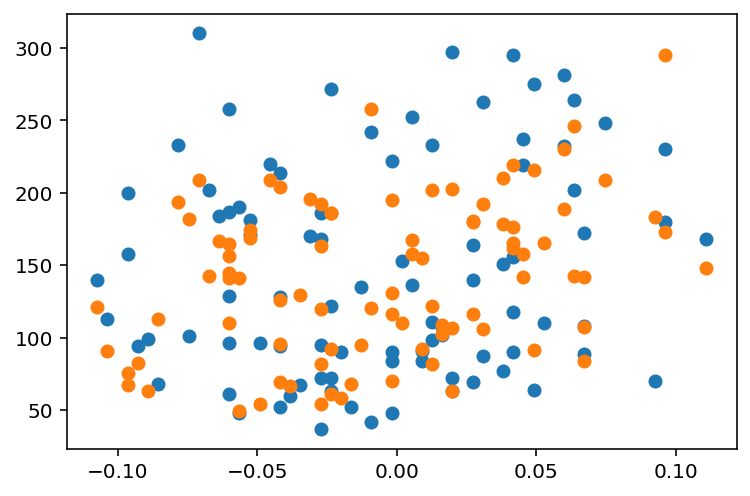

In [351]:
plt.scatter(X_test[:, 0],y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

그림으로 봤을 때 잘 만들어진 것 같다.

## 2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

### (1) 데이터 가져오기

* 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
* https://www.kaggle.com/c/bike-sharing-demand/data  에서 데이터 확인을 할 수 있습니다.


#### 심볼릭 링크는 일종의 바로가기이다.

mkdir -p ~/aiffel/bike_regression/data/bike-sharing-demand<br>
ln -s ~/data/data/bike-sharing-demand/train.csv ~/aiffel/bike_regression/data/bike-sharing-demand

In [352]:
import pandas as pd
train = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

* to_datetime 활용 : 링크 참조<br>
* pandas datetme extract year month day 키워드로 검색해 보기


In [353]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

데이터 타입중 datetime 만 object 이기 때문에 date time 자료형으로 변경해야한다.

In [354]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [355]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

datetime 칼럼을 datetime 자료형으로 바꾸어 주었다.

이제 연, 월, 일, 시, 분, 초까지 6가지 컬럼을 생성해야한다.


In [356]:
import datetime
df=pd.DataFrame(train)

df['year'] = pd.DatetimeIndex(df['datetime']).year
df['month'] = pd.DatetimeIndex(df['datetime']).month
df['day'] = pd.DatetimeIndex(df['datetime']).day
df['hour'] = pd.DatetimeIndex(df['datetime']).hour
df['minute'] = pd.DatetimeIndex(df['datetime']).minute
df['second'] = pd.DatetimeIndex(df['datetime']).second

In [357]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [358]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
dtype: object

### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기


* sns.countplot 활용해서 시각화하기
* subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기


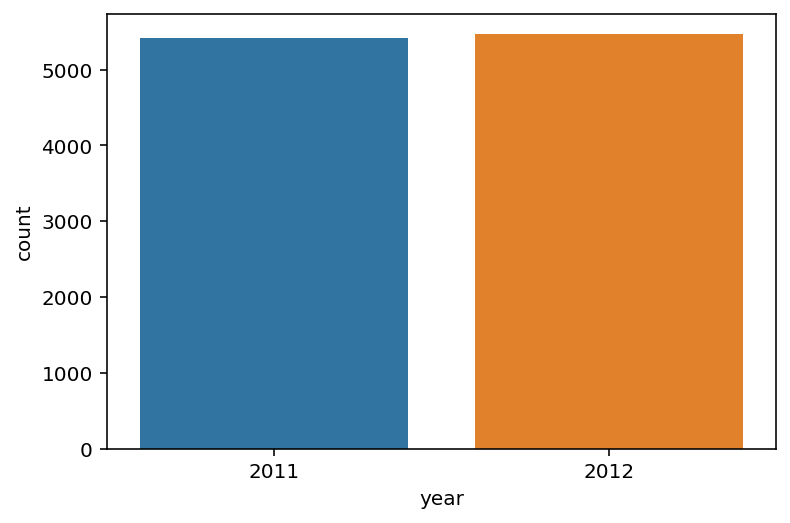

In [359]:
import seaborn as sns
sns.countplot(x="year", data=train)
plt.show(fig)

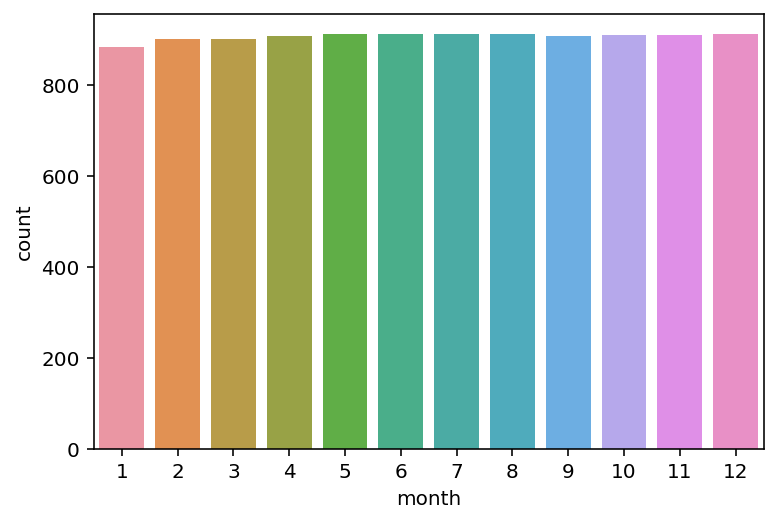

In [360]:
sns.countplot(x="month", data=train)
plt.show()

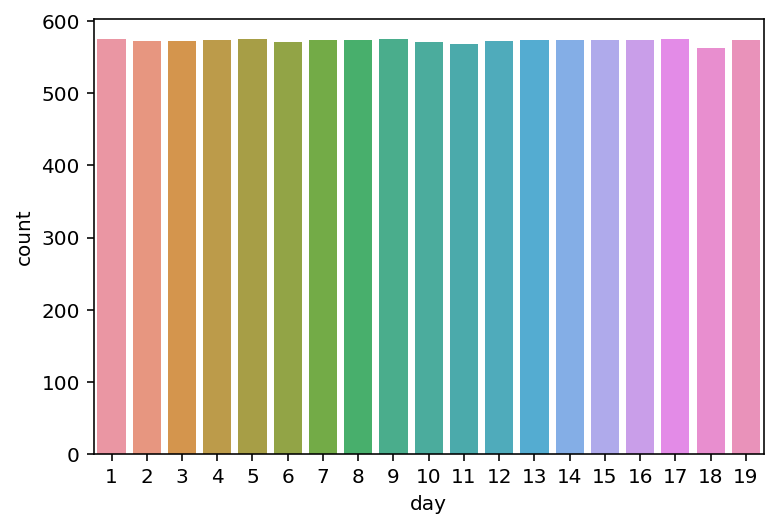

In [361]:
sns.countplot(x="day", data=train)
plt.show()

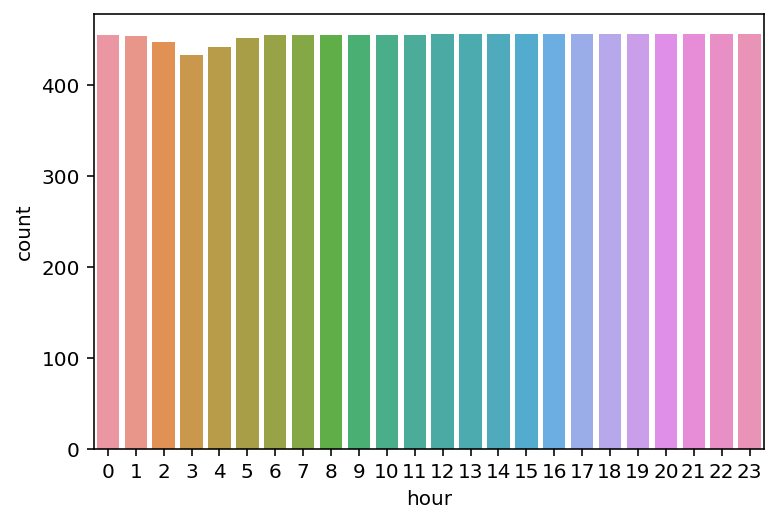

In [362]:
sns.countplot(x="hour", data=train)
plt.show()

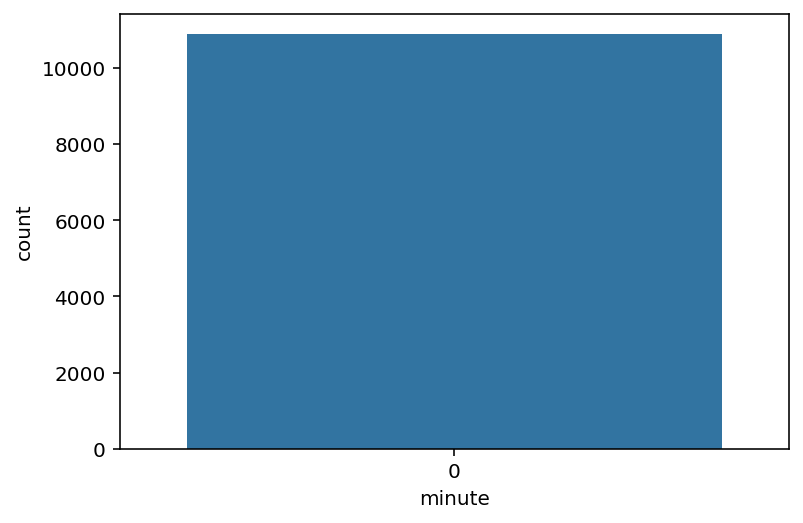

In [363]:
sns.countplot(x="minute", data=train)
plt.show()

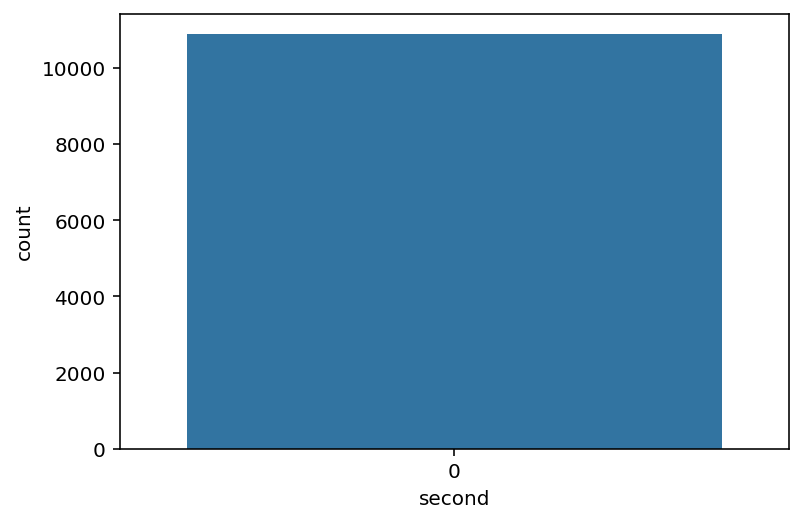

In [364]:
sns.countplot(x="second", data=train)
plt.show()

<AxesSubplot:xlabel='second', ylabel='count'>

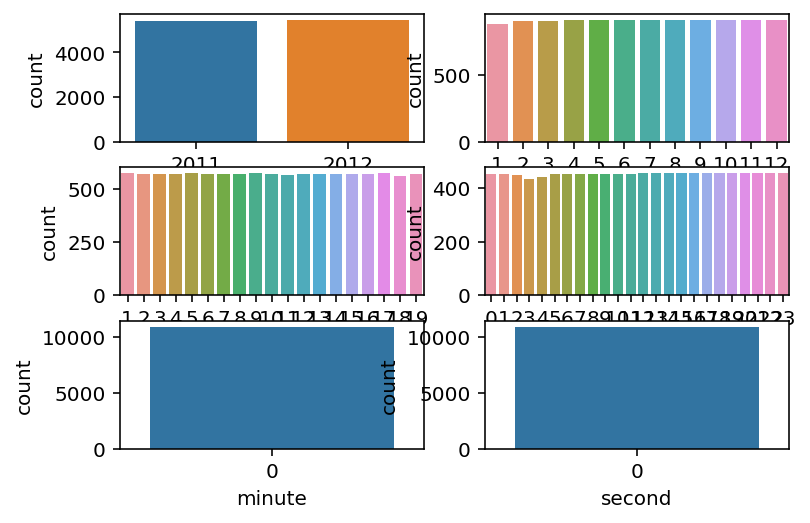

In [365]:
fig = plt.figure() #도화지(그래프) 객체 생성
ax1 = fig.add_subplot(3,2,1)
sns.countplot(x="year", data=train)
ax2 = fig.add_subplot(3,2,2)
sns.countplot(x="month", data=train)
ax3 = fig.add_subplot(3,2,3)
sns.countplot(x="day", data=train)
ax4 = fig.add_subplot(3,2,4)
sns.countplot(x="hour", data=train)
ax5 = fig.add_subplot(3,2,5)
sns.countplot(x="minute", data=train)
ax6 = fig.add_subplot(3,2,6)
sns.countplot(x="second", data=train)

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

* X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
* count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

X에는 문자열 데이터와 쓸모없는 데이터를 제외한 칼럼을 넣어야 한다.
문자열 데이터로는 datetime 이 있고 나머지 변수는 무엇이 쓸모없는 데이터인지 아직 모른다.<br>
그리고 minute와 second는 모두 값이 같으므로 쓸모 없을 것 같다.
따라서 datetime, minute, second을 제외하고 X에 컬럼 데이터를 넣어주고 
y 변수에 count 값을 넣어주려고 한다.



In [366]:
train = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
             'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month','day', 'hour']]


In [367]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
day             int64
hour            int64
dtype: object

In [368]:
X =  train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
             'humidity', 'windspeed', 'casual', 'registered', 'year', 'month','day', 'hour']]

y = train['count'].values
print("X, y 변수 설정")

X, y 변수 설정


In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train 과 test 분리")

train 과 test 분리


### (5) LinearRegression 모델 학습

* sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [370]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [371]:
model.fit(X_train, y_train)


LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

* 학습된 모델에 X_test를 입력해서 예측값 출력하기
* 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
* mse 값과 함께 rmse 값도 계산하기

In [372]:
predictions = model.predict(X_test)
predictions

array([127.,  13., 163., ..., 509.,   5., 239.])

In [373]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2.0617955776178302e-25

In [374]:
rmse = mse ** 0.5
rmse

4.540699921397394e-13

### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

* x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
* x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

1. x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기

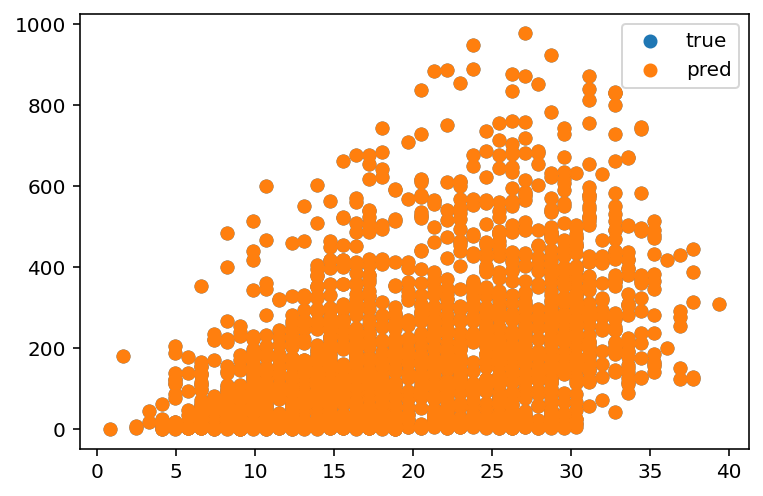

In [375]:
plt.scatter(X_test["temp"], y_test, label="true")
plt.scatter(X_test["temp"], predictions, label="pred")
plt.legend()
plt.show()

오차가 적어서 예상값이 참값을 덮어버렸다.

2. x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

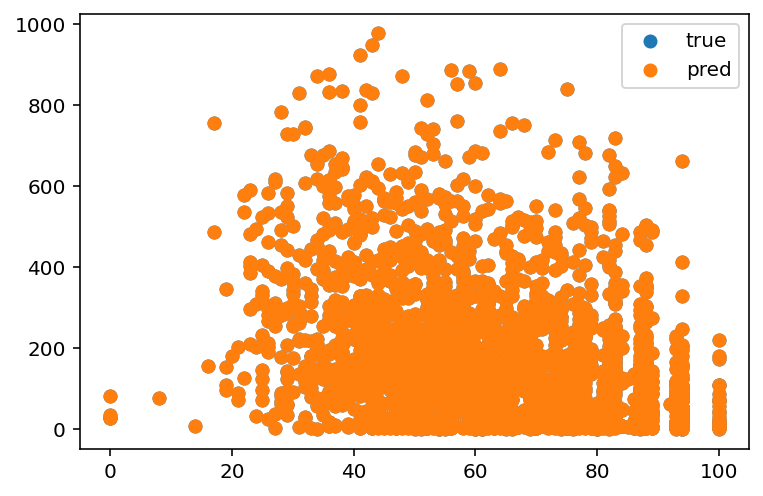

In [376]:
plt.scatter(X_test["humidity"], y_test, label="true")
plt.scatter(X_test["humidity"], predictions, label="pred")
plt.legend()
plt.show()

역시 오차가 적어서 예상값이 참값을 덮어버렸다.

 loss 값이 너무 작았기 때문에 loss 값을 변화 시켜서 한번 똑같이 실험해보겠다.

먼저 train 에 값들을 조금더 지워보겠다.

In [377]:
train = train[['temp', 'atemp','humidity','count', 'year', 'month','day', 'hour']]
X = train[['temp', 'atemp','humidity', 'year', 'month','day', 'hour']]
y = train['count'].values
print("X, y 변수 설정")

X, y 변수 설정


In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("train 과 test 분리")

train 과 test 분리


In [379]:
model.fit(X_train, y_train)


LinearRegression()

In [380]:
predictions = model.predict(X_test)
predictions

array([254.97402187,  62.08915993, 199.57324001, ..., 310.4706916 ,
        38.44799095, 249.30810622])

In [381]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

19977.71364383958

In [382]:
rmse = mse ** 0.5
rmse

141.34254010679015

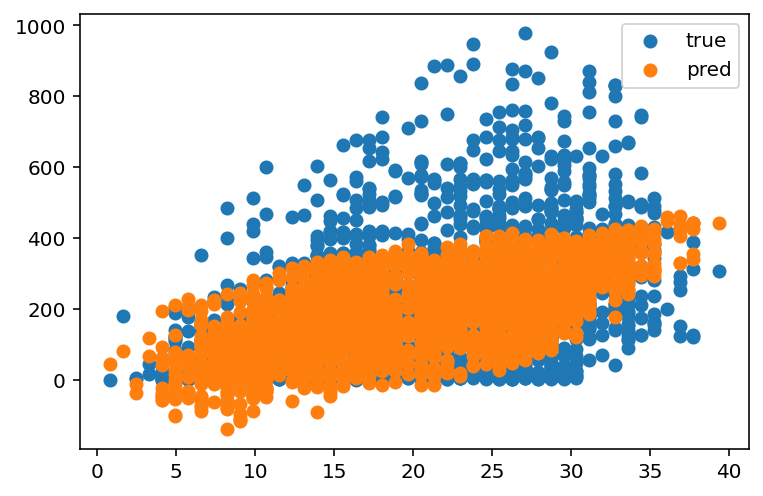

In [383]:
plt.scatter(X_test["temp"], y_test, label="true")
plt.scatter(X_test["temp"], predictions, label="pred")
plt.legend()
plt.show()

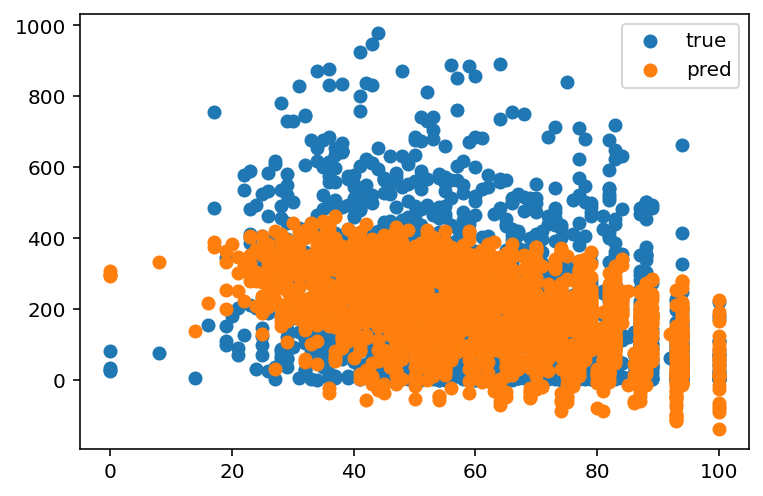

In [384]:
plt.scatter(X_test["humidity"], y_test, label="true")
plt.scatter(X_test["humidity"], predictions, label="pred")
plt.legend()
plt.show()

이번에는 loss값이 적당히 나와줘서 비교가 가능해졌다. 
전 값과 비교를했을 때 이런 차이가 나는 이유는 아마 count 값과 비슷 한 값인 registered 값을 포함해서 계산 했기 때문인 것 같다. 
registered 값을 가지고 있으니 실제 정답과 비슷한 결과를 낼 수 있었다고 생각한다.